In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_df = load_boston()

In [6]:
###checking the description of dataset
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
print(boston_df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
dataset=pd.DataFrame(boston_df.data,columns=boston_df.feature_names)

In [15]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
dataset['Price'] = boston_df.target

In [17]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [19]:
##checking null
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [21]:
####summarising the dataset
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
## Exploratory data analysis
## Correlation

dataset.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [23]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Text(0, 0.5, 'Price')

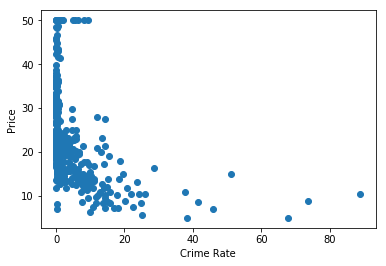

In [26]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

### Crime rate is inversely proportional to the Price

Text(0, 0.5, 'Price')

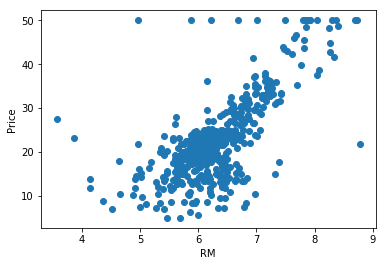

In [29]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

# As RM increase price increases. It is positively correlated

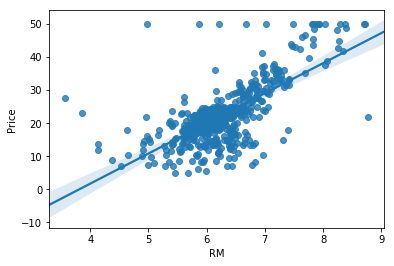

In [31]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

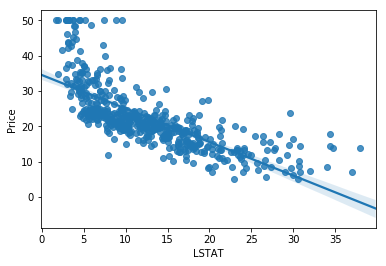

In [32]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

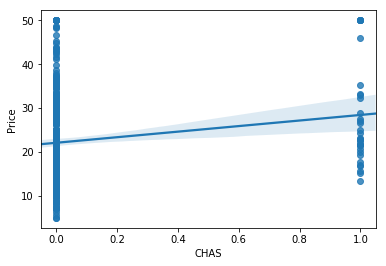

In [35]:
sns.regplot(x="CHAS",y="Price",data=dataset)

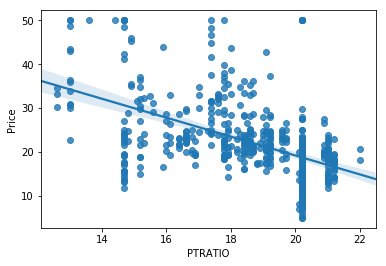

In [36]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [39]:
### Independent and depenedent feature

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [41]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [44]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=10)



In [46]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
130,0.34006,0.0,21.89,0.0,0.624,6.458,98.9,2.1185,4.0,437.0,21.2,395.04,12.60
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62


In [47]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28


In [48]:
#### Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
X_train=scaler.fit_transform(X_train)

In [50]:
X_test = scaler.fit_transform(X_test)

In [53]:
X_test

array([[-0.39701137,  0.99885574, -1.23273944, ...,  0.09114401,
         0.37925269, -0.40922994],
       [-0.4004594 ,  2.25265722, -1.11797048, ..., -1.20188565,
         0.37937341, -0.94341951],
       [-0.39899619,  3.18139906, -1.05063936, ..., -0.9709875 ,
         0.42198727, -0.99272932],
       ...,
       [-0.39816351,  3.18139906, -1.05063936, ..., -0.9709875 ,
         0.42198727, -0.22979703],
       [ 3.54194356, -0.5335683 ,  1.20342302, ...,  0.92237736,
        -4.14216209,  0.35644177],
       [-0.39292757,  0.04689535, -0.3620256 , ..., -1.38660417,
         0.34472701,  0.51943808]])

# Model Training

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
regression = LinearRegression()

In [56]:
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
### print the coefficints and the intercept
print(regression.coef_)

[-1.252809    1.56150248 -0.16861008  0.37449384 -1.7776332   2.23783886
  0.3168073  -3.27712377  2.69471035 -2.10285702 -1.74689193  1.22356691
 -3.83454078]


In [58]:
print(regression.intercept_)

21.971186440677965


In [59]:
#### Prediction with test data

predict=regression.predict(X_test)

In [60]:
predict

array([30.17917005, 30.46701575, 29.81321858, 20.49359622, 17.59135595,
       14.50216977, 33.62090402, 13.58173162, 23.63538558, 34.80146208,
       20.10057918, 28.89650679, 26.75208227, 32.46726239, 31.86448849,
       38.29341095, 22.58734705, 22.40808761, 24.19028165, 19.39661337,
       30.62534577, 16.58785585, 23.90945703, 23.40444466, 30.6383153 ,
       19.25797601, 18.20517141, 15.57548684, 36.00275987,  0.07332544,
       30.81310039, 30.25727273, 24.80903775, 22.28918374, 19.43128766,
       18.43779595,  2.53996283, 33.83183721, 25.55636044, 26.07621463,
       32.19825062, 28.23928304, 17.32537485, 30.09373833, 16.69313412,
       27.01944997, 18.14331906, 20.68254347, 35.99823141, 15.20837191,
       23.17378438, 18.51333559, 23.27380443, 32.0125213 , 24.9058336 ,
       33.14982519, 19.76628398, 18.62789483, 17.82090124, 23.39212415,
       18.30610568, 22.03752816, 36.54393905, 40.34565582, 28.70488713,
       15.58179691, 22.29919402,  3.39746631, 29.92189763, 26.22

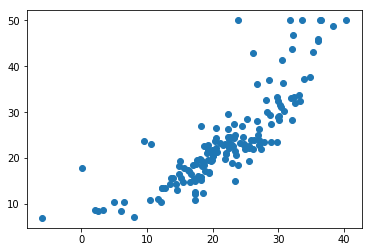

In [61]:
### plot a scatter plot for the prediction
plt.scatter(x=predict,y=y_test)

In [65]:
### Residuals
residuals =y_test-predict

In [66]:
residuals

305    -1.779170
193     0.632984
65     -6.313219
349     6.106404
151     2.008644
433    -0.202170
161    16.379096
129     0.718268
269    -2.935386
226     2.798538
107     0.299421
222    -1.396507
181     9.447918
275    -0.467262
277     1.235512
262    10.506589
325     2.012653
184     3.991912
176    -0.990282
154    -2.396613
157    10.674654
446    -1.687856
114    -5.409457
324     1.595555
192     5.761685
336     0.242024
7       8.894829
458    -0.675487
282     9.997240
412    17.826675
         ...    
493     1.881318
142     0.663032
26      1.667447
173    -4.179791
428    -0.747677
167     3.384779
318     0.314257
99      3.398788
307    -3.875569
404     2.412616
274    -0.950436
252     7.288272
441     0.659594
70      1.628893
302    -0.629931
276     0.758539
386     3.914920
418     6.678052
80      1.212810
440    -1.598877
443    -1.769364
152    -2.929295
417     5.327084
126     2.092685
261     7.830536
56      0.133388
37     -1.040142
66     -6.1756

C:\Users\Vivek Sai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


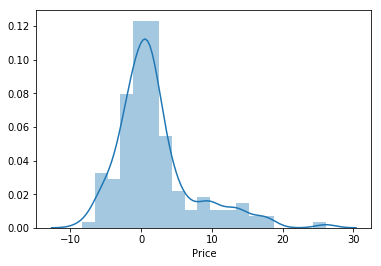

In [73]:
### Plotting the residuals
import seaborn as sns
sns.distplot(residuals)

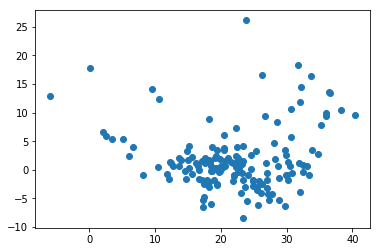

In [74]:
plt.scatter(predict,residuals)

In [76]:
###Uniformly distributed

In [84]:
### performance matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,predict))
print(mean_squared_error(y_test,predict))
print(np.sqrt(mean_squared_error(y_test,predict)))

3.801339888129088
33.342099951090766
5.774261853353273


# R square & Adjusted R square

In [87]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predict)
print(score)

0.6584972274041508


In [89]:
### adjusted r2 
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6263266763625128

# New data prediction

In [91]:
boston_df.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [92]:
## transforming new data
scaler.transform(boston_df.data[0].reshape(1,-1))

array([[-0.4020881 ,  0.30229936, -1.21284615, -0.3308913 , -0.09439656,
         0.2853092 , -0.07645863,  0.13295206, -0.95645447, -0.597002  ,
        -1.34042454,  0.42198727, -0.95026809]])

In [93]:
regression.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

array([28.55369436])

# Pickling the model file for the deployment

In [94]:
import pickle

In [96]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [98]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [100]:
pickled_model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

array([28.55369436])